In [1]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt

In [2]:
np.random.seed(0)

In [3]:
# グラフの生成
probs = [
    [0.1, 0.02],
    [0.02, 0.1],
]
n1 = 50
n2 = 50
n = n1 + n2
G = nx.stochastic_block_model([n1, n2], probs, seed=0)
X = np.random.rand(n, 3)
pos = nx.layout.spring_layout(G, seed=3)

In [4]:
A = nx.adjacency_matrix(G).todense()
D = A.sum(1)
A_norm = A / np.sqrt(D.reshape(n, 1)) / np.sqrt(D.reshape(1, n))

In [5]:
Z1 = A_norm @ X
Z2 = A_norm @ Z1
Z3 = A_norm @ Z2
Zs = [X, Z1, Z2, Z3]

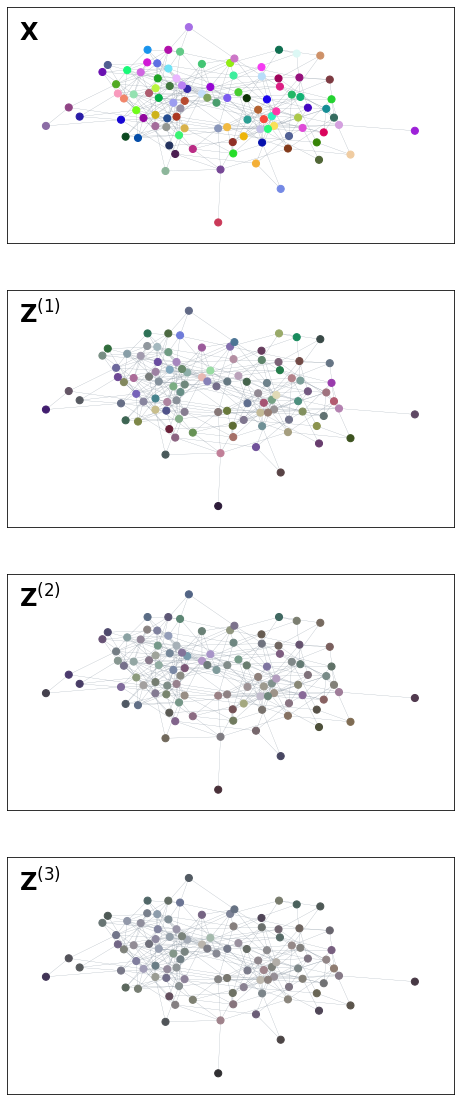

In [6]:
fig = plt.figure(figsize=(8, 20))
texts = ['$\mathbf{X}$', '$\mathbf{Z}^{(1)}$', '$\mathbf{Z}^{(2)}$', '$\mathbf{Z}^{(3)}$']
for i in range(4):
    ax = fig.add_subplot(4, 1, i + 1)
    nx.draw_networkx(G, ax=ax, pos=pos, node_size=50, node_color=np.minimum(Zs[i], 1), labels={i: '' for i in range(n)}, edge_color='#84919e', width=0.2)
    ax.text(-1, 0.5, texts[i], fontsize=24)

In [7]:
# 頂点特徴量に相関がある場合
X = np.random.rand(n, 3)
X[:n1, 1] = 0
X[n1:, 0] = 0

In [8]:
Z1 = A_norm @ X
Z2 = A_norm @ Z1
Z3 = A_norm @ Z2
Z3 = A_norm @ Z2
Zs = [X, Z1, Z2, Z3]

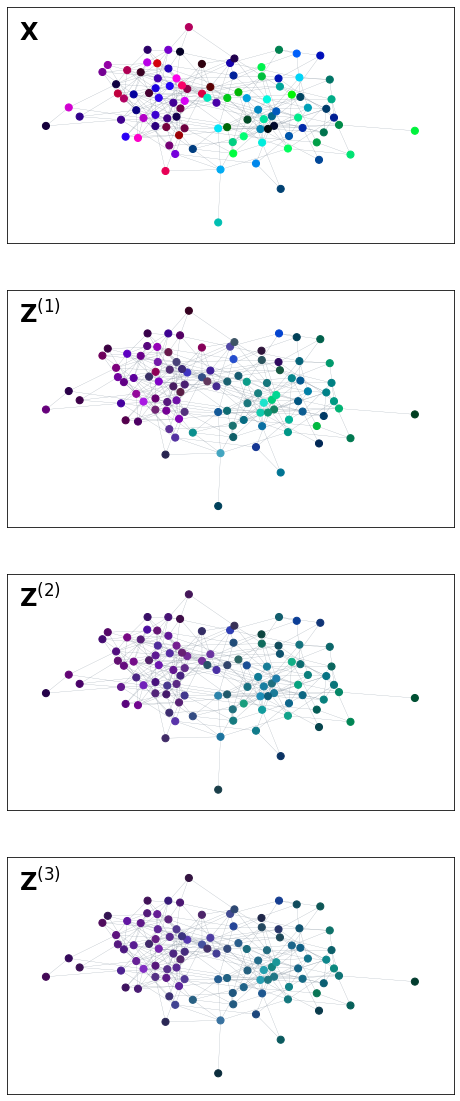

In [9]:
fig = plt.figure(figsize=(8, 20))
texts = ['$\mathbf{X}$', '$\mathbf{Z}^{(1)}$', '$\mathbf{Z}^{(2)}$', '$\mathbf{Z}^{(3)}$']
for i in range(4):
    ax = fig.add_subplot(4, 1, i + 1)
    nx.draw_networkx(G, ax=ax, pos=pos, node_size=50, node_color=np.minimum(Zs[i], 1), labels={i: '' for i in range(n)}, edge_color='#84919e', width=0.2)
    ax.text(-1, 0.5, texts[i], fontsize=24)

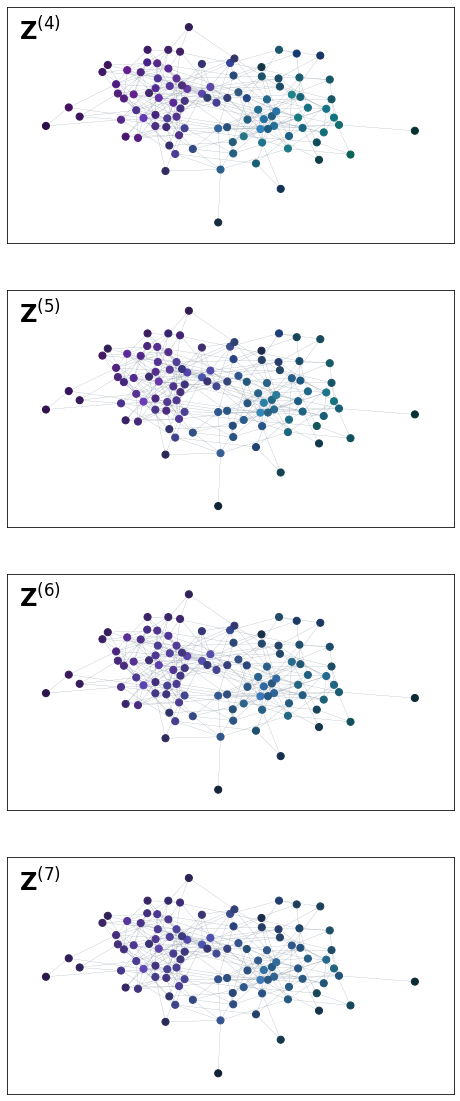

In [10]:
# さらに平滑化すると

Z4 = A_norm @ Z3
Z5 = A_norm @ Z4
Z6 = A_norm @ Z5
Z7 = A_norm @ Z6
Zs = [Z4, Z5, Z6, Z7]

fig = plt.figure(figsize=(8, 20))
texts = ['$\mathbf{Z}^{(4)}$', '$\mathbf{Z}^{(5)}$', '$\mathbf{Z}^{(6)}$', '$\mathbf{Z}^{(7)}$']
for i in range(4):
    ax = fig.add_subplot(4, 1, i + 1)
    nx.draw_networkx(G, ax=ax, pos=pos, node_size=50, node_color=np.minimum(Zs[i], 1), labels={i: '' for i in range(n)}, edge_color='#84919e', width=0.2)
    ax.text(-1, 0.5, texts[i], fontsize=24)